In [1]:
import numpy as np
import librosa

In [2]:
from numpy import asarray
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import exp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import random
import cv2
import math

In [13]:
ori_files = '..//audios//test//keyboard_acoustic.wav'
target_files = '..//audios//test//string_acoustic.wav'
cqt_files = './/keyboard_acoustic_2_string_acoustic_cqt//020//audio.wav'
stft_files = './/keyboard_acoustic_2_string_acoustic_stft//005//audio.wav'

ori, ori_fs = librosa.load(ori_files, sr=None, mono=True)
tar, tar_fs = librosa.load(target_files, sr=None, mono=True)
cqt,_ = librosa.load(cqt_files, sr=None, mono=True)
stft, stft_fs = librosa.load(stft_files, sr=None, mono=True)
length = 300000

ori,tar,stft,cqt =ori[:length], tar[:length],stft[:length],cqt[:length]

def enlarge(x):
#     return (x+1)/2
    return (x-min(x))/(max(x)-min(x))+0.0000001
ori,tar,stft,cqt=enlarge(ori[:length]),enlarge(tar[:length]),enlarge(stft[:length]),enlarge(cqt[:length])

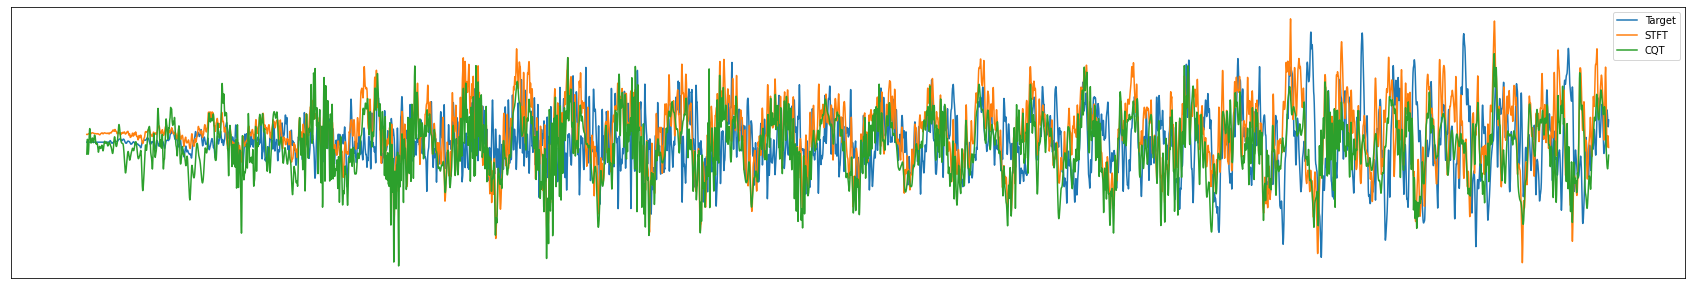

In [16]:
plt.figure(figsize=(30,5))
plt.xticks([])
plt.yticks([])
plt.plot(tar[:10000],label='Target')
plt.plot(stft[:10000],label='STFT')
plt.plot(cqt[:10000],label='CQT')
plt.legend()

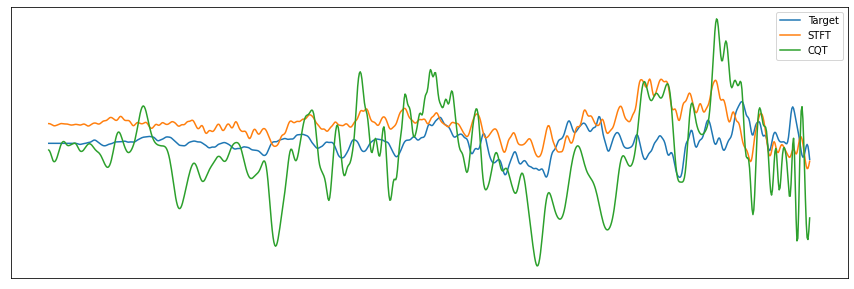

In [18]:
plt.figure(figsize=(15,5))
plt.xticks([])
plt.yticks([])
plt.plot(tar[100:1000],label='Target')
plt.plot(stft[100:1000],label='STFT')
plt.plot(cqt[100:1000],label='CQT')
plt.legend()

# Calculate cross entropy

In [4]:
kl=0
for i in range(length):
    kl+= tar[i]*math.log(ori[i])
-kl/30000

3.6919441612824633

In [5]:
kl=0
for i in range(length):
    kl+= tar[i]*math.log(stft[i])
-kl/30000

3.342171243657496

In [6]:
kl=0
for i in range(length):
    kl+=tar[i]*math.log(cqt[i])
-kl/30000

3.857165038540026

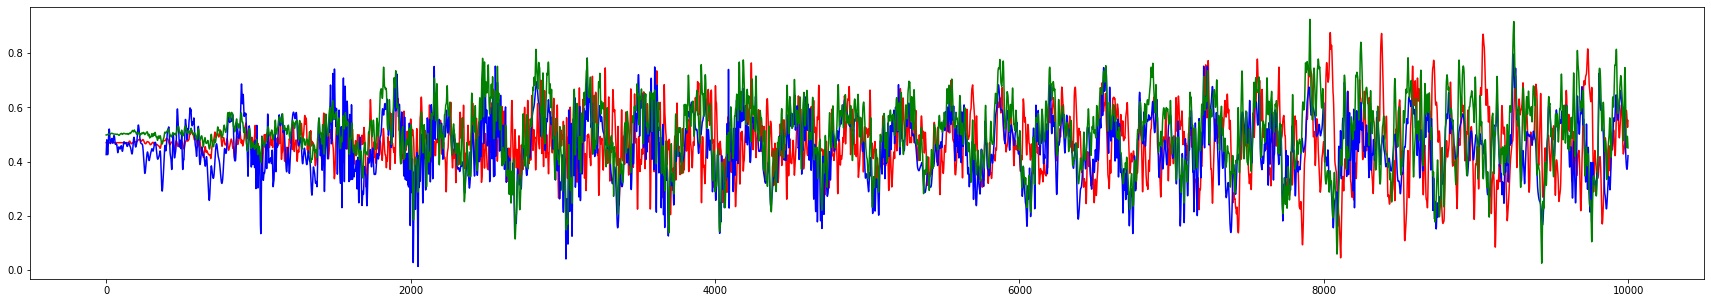

In [7]:
plt.figure(figsize=(30,5))
plt.plot(tar[:10000],c='r')
plt.plot(cqt[:10000],c='b')
plt.plot(stft[:10000],c='g')

# calculate FID

In [8]:
amin=1/(2**16)
def get_spectrogram(audio):
    window = np.hanning(1024)
    S = librosa.stft(audio, n_fft=1024, hop_length=int(1024/2), window=window)
    mag, phase = librosa.magphase(S)
    mag = mag[0:int(mag.shape[0]/2), :]
    mag = librosa.amplitude_to_db(mag, ref=np.min, amin=1/(2**16)) # amplitude to db
    mag /= 20*np.log1p(1/amin ) # normalize
    return mag, phase
tar,_ = get_spectrogram(tar)
stft,_ = get_spectrogram(stft)
cqt,_ = get_spectrogram(cqt)
ori,_ = get_spectrogram(ori)

In [9]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from scipy.linalg import sqrtm
 
def calculate_fid(act1, act2):
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis= 0), cov(act1, rowvar= False)
    mu2, sigma2 = act2.mean(axis= 0), cov(act2, rowvar= False)
 
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)* 2.0)
 
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
 
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
        # calculate score
        fid = ssdiff + trace(sigma1 + sigma2 - 2.0*covmean)
    return fid
calculate_fid(cqt,tar),calculate_fid(stft,tar),calculate_fid(tar,ori)

(23.15345163777863, 2.6588975845645204, 26.254450115137896)

# calculate audio distance

In [10]:
np.sum(np.sqrt(np.square(stft-tar))),np.sum(np.sqrt(np.square(cqt-tar))),np.sum(np.sqrt(np.square(ori-tar)))

(2852.537, 4472.1333, 4579.672)